In [103]:

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

In [82]:
pipeline = pd.read_csv('C:/Python27/reviews_ratings.csv')[['Listing ID','Sentimentscore']]
airbnb= pd.read_csv('C:/Python27/AirbnbRating.csv')[['Id','Overall']]

In [81]:
# Get the overall ratings for each listing from the pipeline and save them in a new csv file

set1=pipeline.groupby('Listing ID').mean().round(1)
set1.to_csv(path_or_buf='C:/Python27/Pipelineclean.csv')

In [83]:
# Delete all the rows with a NaN value and save in a new csv. Both the csv will be joined using the command line
# and based on Listing ID

set2 = airbnb.dropna()
set2.to_csv(path_or_buf='C:/Python27/Airbnbclean.csv')

In [84]:
# Read the csv of the merged file

comparison=pd.read_csv('C:/Python27/merged_comparison.csv')
comparison[:10]

,Listing ID,Overall,Sentimentscore
0,1000126,5.0,4.0
1,1000252,5.0,4.0
2,1000866,5.0,4.5
3,1001885,4.5,4.0
4,1002180,4.5,4.0
5,1002602,5.0,4.5
6,1004255,4.5,4.0
7,1004473,4.0,3.5
8,1004908,5.0,4.0
9,1005026,5.0,4.5


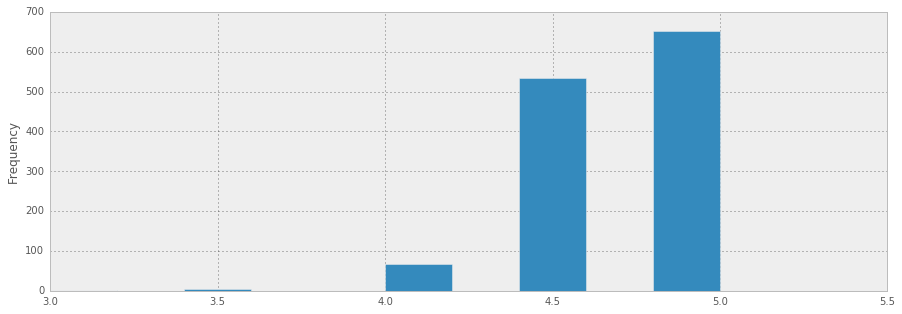

In [143]:
# Visualization of ratings generated from Airbnb system
comparison['Overall'].plot.hist(histtype='bar')


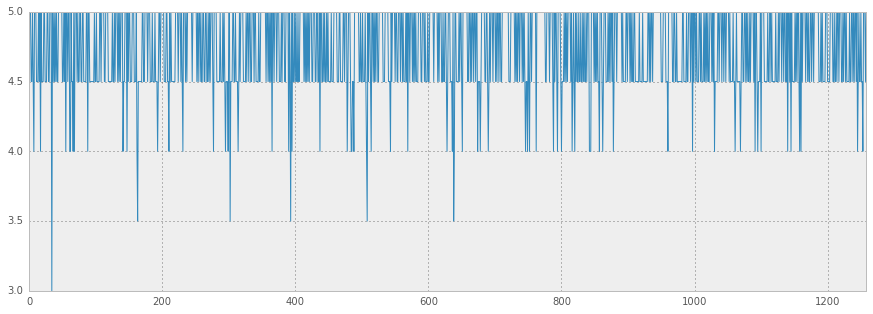

In [145]:
comparison['Overall'].plot()

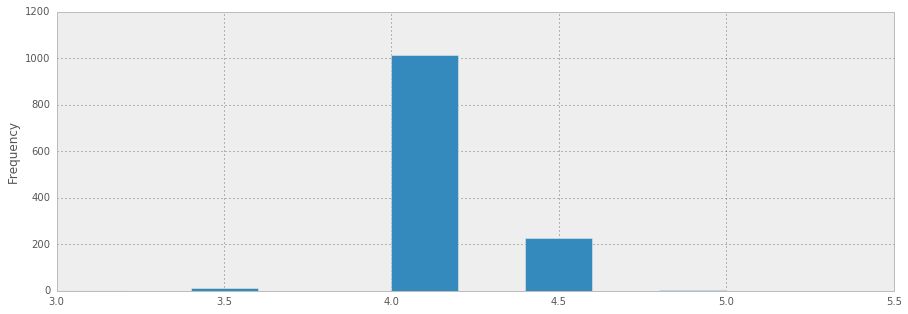

In [126]:
# Visualization of Sentiment scores from the pipeline
comparison['Sentimentscore'].plot(kind='hist')

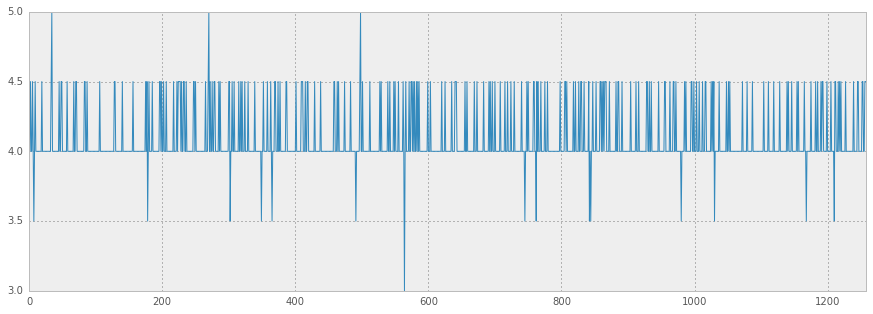

In [129]:
comparison['Sentimentscore'].plot()

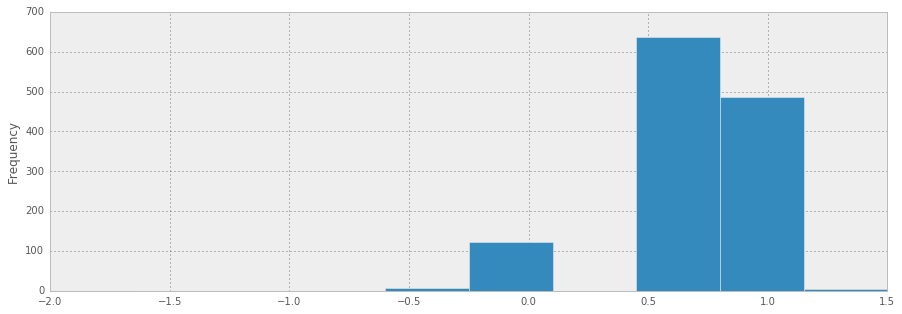

In [123]:
# The graph shows the differences between Airbnb and the pipeline
# It can clearly idicated that for most of the cases the ratings of the system are higher than the pipeline

difference = comparison['Overall']-comparison['Sentimentscore']
difference.plot(kind='hist')

In [107]:
# Find the percentage of values that in Airbnb system are higher than ratings generated from the pipeline
# The results mean that from text feedback we generate lower ratings than the system, therefore sentiment
# analysis can be used for reducing the bias in Airbnb system

higher=0
no_diff=0
lower=0
for item in difference:
    if 0<item:
        higher+=1
    elif item ==0:
        no_diff+=1
    else:  lower+=1

total=higher+ no_diff+lower
print "The percentage of higher values is: "
print higher/total

The percentage of higher values is: 
0.89674344718


In [116]:

count05=0
count1=0
more=0
for item in difference:
    if item==0.5:
        count05+=1
    elif item==1:
        count1+=1
    elif 1<item:
        more+=1
print "Diff 0.5        Diff 1         Diff +1  "
print count05/total, count1/total, more/total

Diff 0.5        Diff 1         Diff +1  
0.505957108817 0.386814932486 0.00397140587768
